In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [3]:
#path to project
path = r'/Users/rendo/A6_Shootings'

In [4]:
path

'/Users/rendo/A6_Shootings'

In [5]:
# Import data
mass_murders = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'mass_murders.csv'))

In [6]:
mass_murders.head()

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
0,0,2728246,12-Oct-23,Minnesota,Princeton,200 block of 190th Ave NE,0,5,0,1,1
1,1,2727876,10-Oct-23,Wisconsin,Madison,116 Milky Way,1,3,0,0,0
2,2,2725771,8-Oct-23,Illinois,Chicago,316 W Erie St,0,8,0,0,0
3,3,2725838,8-Oct-23,Pennsylvania,Indiana,640 N 5th Ave,1,8,0,0,0
4,4,2726444,8-Oct-23,Louisiana,Gonzales,616 N Tobey Ave,0,4,0,0,0


In [7]:
# create subset
df_sub = mass_murders[[ 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']]

In [8]:
mass_murders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3084 non-null   int64 
 1   Incident ID        3084 non-null   int64 
 2   Incident Date      3084 non-null   object
 3   State              3084 non-null   object
 4   City Or County     3084 non-null   object
 5   Address            3084 non-null   object
 6   Victims Killed     3084 non-null   int64 
 7   Victims Injured    3084 non-null   int64 
 8   Suspects Killed    3084 non-null   int64 
 9   Suspects Injured   3084 non-null   int64 
 10  Suspects Arrested  3084 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 265.2+ KB


In [9]:
mass_murders.index

RangeIndex(start=0, stop=3084, step=1)

In [10]:
print (mass_murders.columns.tolist())

['Unnamed: 0', 'Incident ID', 'Incident Date', 'State', 'City Or County', 'Address', 'Victims Killed', 'Victims Injured', 'Suspects Killed', 'Suspects Injured', 'Suspects Arrested']


In [11]:
df_sub

,Suspects Killed,Suspects Injured,Suspects Arrested
0,0,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
3079,0,0,1
3080,0,0,1
3081,0,0,0
3082,0,0,0


# Step 3

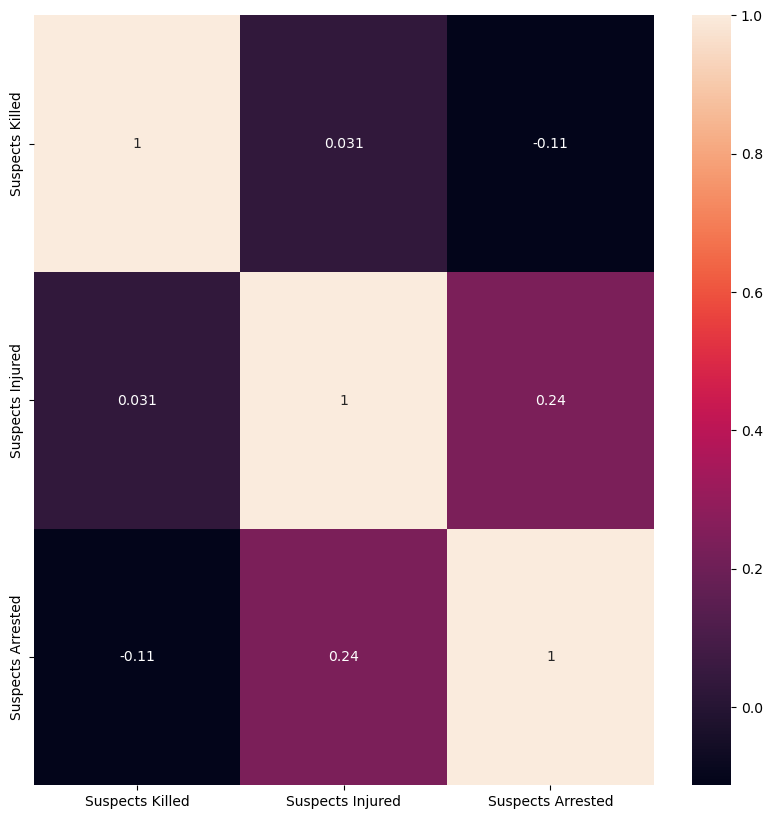

In [12]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_1 = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

#### arrested and injured are the highest correlation which makes sense if they reported an injury and an arrest. 

# Step 4

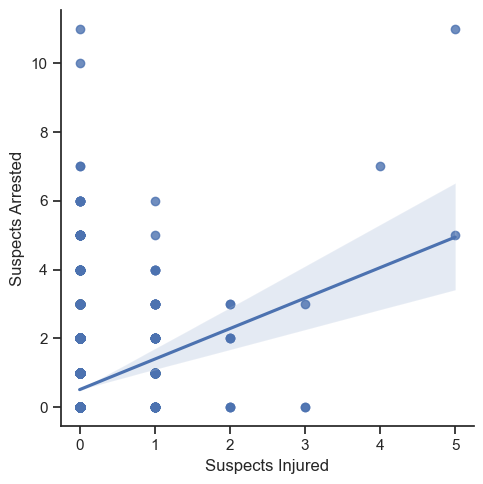

In [27]:
# Create scatterplot for the "minimum_nights" and "reviews_per_month" columns
sctplt = sns.lmplot(x = 'Suspects Injured', y = 'Suspects Arrested', data = mass_murders)

In [28]:
#Export viz
sctplt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot.png'))

#### Correlation skews upward. Suspects were arrested and not injured more than being injured and arrested. Which makes sense. The injury would either be reported as an arrest or a death but not just an injury.

# Step 5

In [14]:
# Check columns
mass_murders.columns

Index(['Unnamed: 0', 'Incident ID', 'Incident Date', 'State', 'City Or County',
       'Address', 'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested'],
      dtype='object')

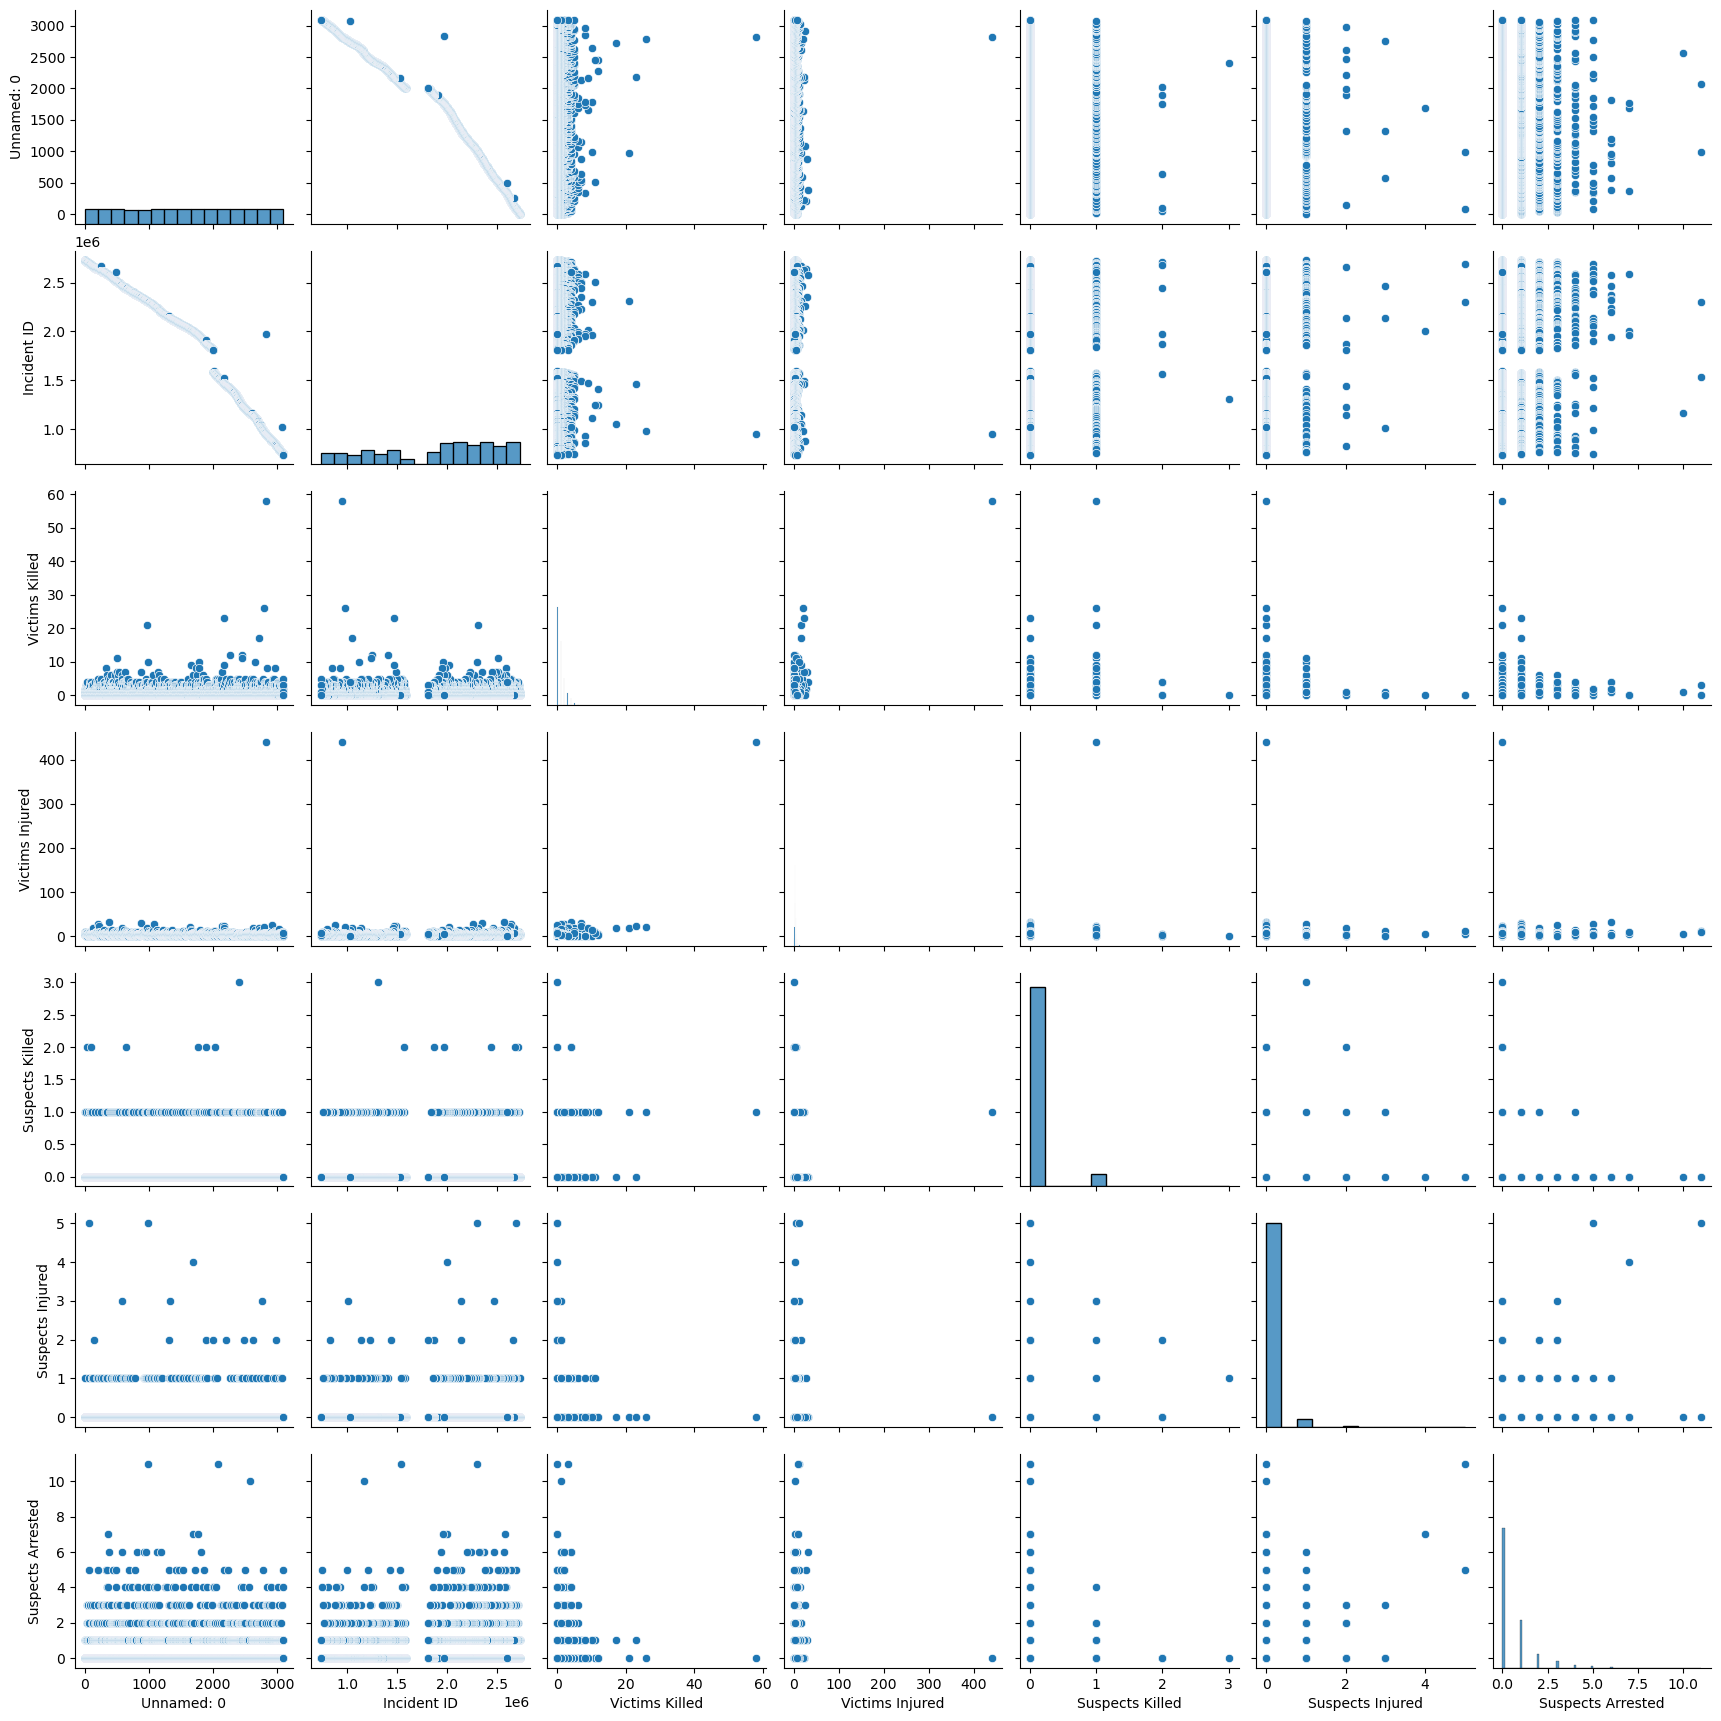

In [15]:
# Create pair plot
pairplot = sns.pairplot(mass_murders)

In [16]:
#Export viz
pairplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

#### I'd like to compare suspect death/injuries to victim death/injuries. Looking at suspects arrested vs victims killed the more victims there are the less arrest. Which could be caused by police intervention by lethal force.

# Step 6

<Axes: xlabel='Suspects Arrested', ylabel='Count'>

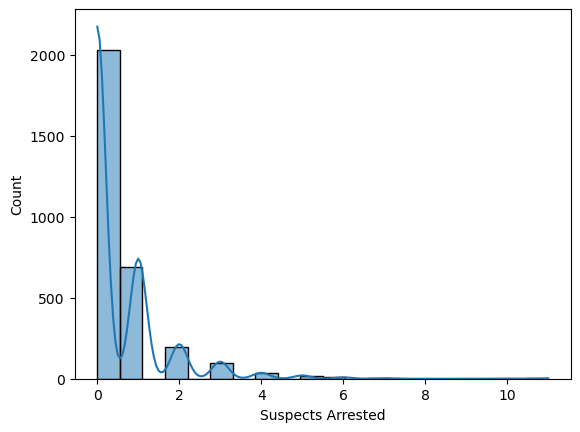

In [17]:
sns.histplot(mass_murders['Suspects Arrested'],bins = 20, kde = True)

<Axes: xlabel='Victims Killed', ylabel='Count'>

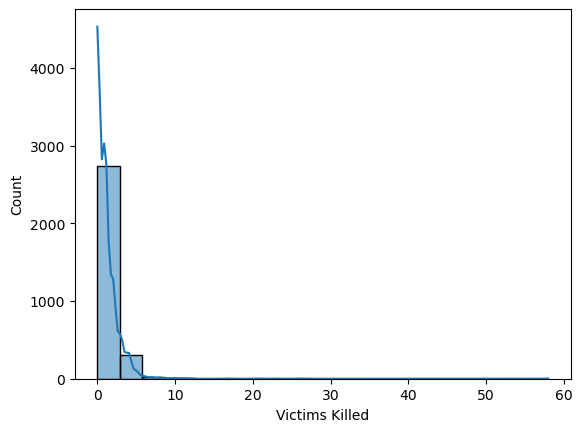

In [18]:
sns.histplot(mass_murders['Victims Killed'],bins = 20, kde = True)

<Axes: xlabel='Suspects Injured', ylabel='Count'>

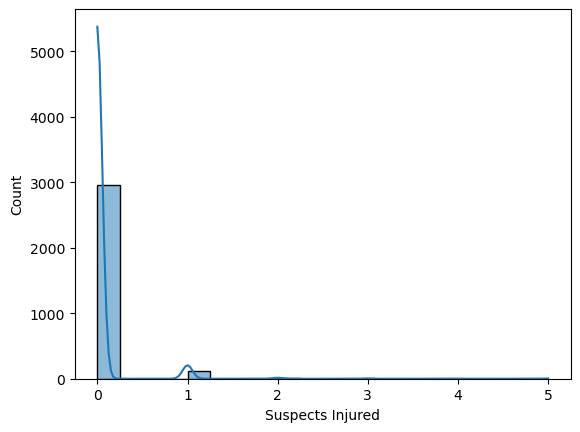

In [19]:
sns.histplot(mass_murders['Suspects Injured'],bins = 20, kde = True)

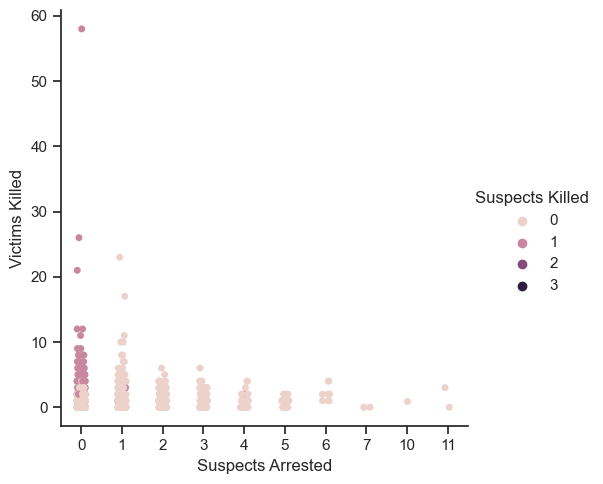

In [20]:
# Create Categorical Plot
sns.set(style = "ticks")
cat_1 = sns.catplot(x = 'Suspects Arrested', y = 'Victims Killed', hue = 'Suspects Killed', data = mass_murders)

In [29]:
#Export viz
cat_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'suspects_injured_vs_deaths.png'))

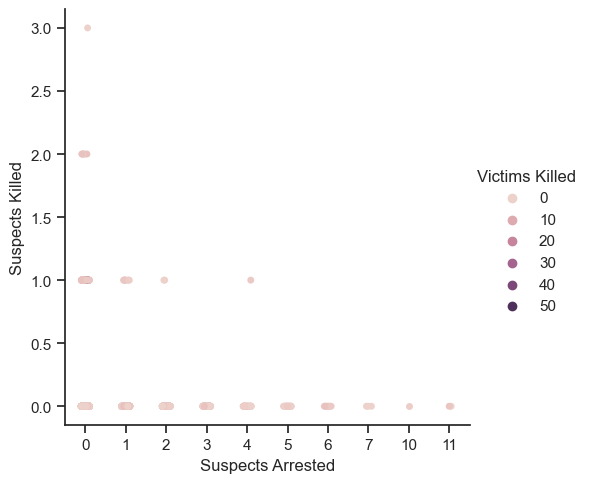

In [21]:
# Create Categorical Plot
sns.set(style = "ticks")
cat_2 = sns.catplot(x = 'Suspects Arrested', y = 'Suspects Killed', hue = 'Victims Killed', data = mass_murders)

More victim deaths happen with suspect deaths. The less victims killed the more arrest happen. The chart is heavy left sidded with suspect deaths compared to when more arrest happen less victims are killed. 

In [25]:
#Export viz
cat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'suspects_injured_vs_deaths.png'))

# Step 7

###### Are more suspects arrested? 

Based on the above charts its hard to tell. The charts used give us insights into suspects injured during arrest though. It also shows the more victim deaths the less suspect arrest due to suspect deaths. Unless we can assume there are multiple suspects. 

# Step 8

I feel like alot of these charts aren't needed for this type of analysis. correlation between suspect injuries and arrests was .24 which was our highest correlation but was still low. however you can arrest injured suspects, whereas it would be hard to arrest a dead suspect. It makes sense that suspects are injured upon arrest if lethal force was authorized to take down suspects. I'd be curious to know how many suspects each case has. the one case where there are roughly 58 victim deaths and only one suspect death raises the question of how many suspects are there in that one incident?